# Session 7 - Parallel Processing and the Veneer command line

This session looks at options for parallel processing with Veneer - that is, by running multiple copies of Source, each with a Veneer server running, and giving instructions to each running copy in parallel.

You can establish multiple copies of Source/Veneer by running multiple copies of the Source application, loading a project and starting the Web Server Monitoring window on each one. Alternatively, you can use the Vener Command Line, which presents the same interface to Python and other systems, without the overheads of the user interface.

This session shows how you can run the Veneer command line and use it from Python as you would the main Source application. 

## Overview

- Launching multiple copies of Veneer command line using veneer-py
- Running simulations in parallel

## Which Model?

**Note:** This session uses `ExampleProject/RiverModel1.rsproj`. You are welcome to work with your own model instead, however you will need to change the notebook text at certain points to reflect the names of nodes, links and functions in your model file.


## The Veneer Command Line

The Veneer command line is a standalone executable program that runs the Source engine and exposes the Veneer network interface, without the main Source user interface. This means that all the veneer-py functionality able to be used whether you are running the Source application or the Veneer command line.

### Setting up the command line

The Veneer Command Line is distributed with Veneer, although the setup process is a little different to the regular Veneer. The Veneer Command Line is a standalone, executable program (specifically `FlowMatters.Source.VeneerCmd.exe`) and can be found in the directory where you installed (probably unzipped) Veneer.

Now, where the Veneer plugin DLL can be installed and used from any directory, the Veneer Command Line needs access to all of the main libraries (DLLs) supplied with Source - and so the Veneer Command Line and the Source DLLs must reside in the same directory.

There are two options. You can either

1. copy the program and the other files supplied with Veneer, into your main Source installation directory, or
2. copy ALL of the files from the main Source directory into a common directory with Veneer.

Once you've done so, you should be able to run the Veneer command line. You can launch the Veneer command line directory from a Windows command prompt. Alternatively, you can start one or more copies directly from Python using `veneer.manage.start` (described below).

Because it is a common requirement for everyone to co-locate the Veneer Command Line with the files from the Source software, veneer-py includes a `create_command_line` function that performs the copy for you:

In [1]:
from veneer.manage import create_command_line

In [2]:
help(create_command_line)

Help on function create_command_line in module veneer.manage:

create_command_line(veneer_path, source_version='4.1.1', source_path='C:\\Program Files\\eWater', dest=None)
    Copy all Veneer related files and all files from the relevant Source distribution to a third directory,
    for use as the veneer command line.
    
    veneer_path: Directory containing the Veneer files
    
    source_version: Version of Source to locate and copy
    
    source_path: Base installation directory for eWater Source
    
    dest: Destination to copy Source and Veneer to. If not provided, a temporary directory will be created.
    
    Returns: Full path to FlowMatters.Source.VeneerCmd.exe for use with start()
    
    Note: It is your responsibility to delete the copy of Source and Veneer from the destination directory
    when you are finished with it! (Even if a temporary directory is used!)



In [3]:
veneer_install = 'D:\\src\\projects\\Veneer\\Compiled\\Source 4.1.1.4484 (public version)'
source_version = '4.1.1'
cmd_directory = 'E:\\temp\\veneer_cmd'
veneer_cmd = create_command_line(veneer_install,source_version,dest=cmd_directory)
veneer_cmd

'E:\\temp\\veneer_cmd\\FlowMatters.Source.VeneerCmd.exe'

### Starting the Command Line

You can run `FlowMatters.Source.VeneerCmd.exe` program from a windows command prompt, but throughout these tutorials, we will use veneer-py functions for starting and stopping the program.

Specifically, we will use `start` to start one or more copies of the program and `kill_all_now` to shutdown the program. (Alternatively, they will shutdown when the Jupyter notebook is shutdown).

In [4]:
from veneer.manage import start,kill_all_now

In [5]:
help(start)

Help on function start in module veneer.manage:

start(project_fn, n_instances=1, ports=9876, debug=False, remote=True, script=True, veneer_exe=None)
    Start one or more copies of the Veneer command line progeram with a given project file
    
    Parameters:
    
    - project_fn - Path to a Source project file (.rsproj)
    
    - n_instances - Number of copies of the Veneer command line to start (default: 1)
    
    - ports - A single port number, indicating the port number of the first copy of the Veneer command line,
              OR a list of ports, in which case len(ports)==n_instances  (default: 9876)
    
    - debug - Set to True to echo all output from Veneer Command Line during startup
    
    - remote - Allow remote connections (requires registration)
    
    - script - Allow IronPython scripts
    
    - veneer_exe - Optional (but often required) path to the Veneer Command Line. If not provided,
                   veneer-py will attempt to identify the version of Ven

The main things you need, in order to call `start` are a Source project file (a path to the `.rsproj` file) and a path to the Veneer command line exe. (The latter we saved to variable `veneer_cmd` on calling `create_command_line`).

In [6]:
project='ExampleProject/RiverModel1.rsproj'


We can now start up a number of Veneer command line 'servers'.

We'll specify how many we want using `num_copies` - Its a good idea to set this based on the number of CPU cores available.

We also set `first_port` - Which is used for the first server. This number is incremented by one for each extra server.

In [7]:
num_copies=4
first_port=9990
processes, ports = start(project,n_instances=num_copies,ports=first_port,debug=True,remote=False,veneer_exe=veneer_cmd)

Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9990 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel1.rsproj"
Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9991 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel1.rsproj"
Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9992 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel1.rsproj"
Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9993 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel1.rsproj"
[0] Loading plugins

[1] Loading plugins

[2] Loading plugins

[3] Loading plugins

[3] Loaded D:\src\projects\Veneer\Compiled\GBRSource\FlowMatters.Source.Veneer.dll

[3] Loaded D:\src\projects\gbr\Output\Plugins\CommunityPlugins\Dynamic_SedNet.dll

[3] Loaded D:\src\projects\gbr\Output\Plugins\CommunityPlugins\GBR_DynSed_Extension.dll

[3] Loaded D:\src\projects\gbr\Output\Plugins\CommunityPlugins\ReefH

You should see a number of lines along the lines of `[3] Server started. Ctrl-C to exit...` indicating that the servers have started.

These servers will now run until your current python session ends. (To make that happen, without closing the notebook, use the `Kernel|Restart` menu option in Jupyter)


## Parallel Simulations

You can now work with each of these Veneer servers in the same way that you worked with a single server in the earlier sessions.

You will need an instance of the Veneer client object - one for each instance.

Here, we'll create a list of Veneer clients, each connected to a different instance based on the port number

In [8]:
import veneer

In [9]:
ports # Saved when we called start()

[9990, 9991, 9992, 9993]

In [10]:
vs = [veneer.Veneer(port=p) for p in ports]

You can now ask one of these servers to run a model for you:

In [11]:
vs[0].run_model()
vs[0].retrieve_multiple_time_series(criteria={'RecordingVariable':'Downstream Flow Volume'})[0:10]

,Default Link #4:Downstream Flow Volume,Default Link #5:Downstream Flow Volume,End Of System:Downstream Flow Volume,MFR:Downstream Flow Volume,SP:Downstream Flow Volume,SR2:Downstream Flow Volume,SR3:Downstream Flow Volume,Storage:Downstream Flow Volume,Ungauged Inflow:Downstream Flow Volume,Water User:Downstream Flow Volume
1901-01-01,0.000000,514.15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,514.15,0
1901-01-02,0.000000,483.35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.35,0
1901-01-03,6349.027111,1815.10,6349.027111,6349.027111,6349.027111,6349.027111,6349.027111,6349.027111,1815.10,0
1901-01-04,0.000000,2857.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2857.05,0
1901-01-05,0.000000,2763.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2763.25,0
1901-01-06,316601.314118,11478.60,316601.314118,316601.314118,316601.314118,316601.314118,316601.314118,316601.314118,11478.60,0
1901-01-07,0.000000,8350.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8350.30,0
1901-01-08,0.000000,5412.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5412.40,0
1901-01-09,0.000000,3761.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3761.10,0
1901-01-10,0.000000,2825.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2825.20,0


You could run a model on each server using a for loop:

In [12]:
for v in vs:
    veneer.log('Running on port %d'%v.port)
    v.run_model()
print('All runs finished')

Running on port 9990
Running on port 9991
Running on port 9992
Running on port 9993
All runs finished


But that is a sequential run - One run won't start until the previous run has finished.

The `run_async` option on `v.run_model` will trigger the run on the server and then allow Python to continue:


In [13]:
for v in vs:
    veneer.log('Running on port %d'%v.port)
    v.run_model(run_async=True)
print('All runs started... But when will they finish? And how will we know?')

Running on port 9990
Running on port 9991
Running on port 9992
Running on port 9993
All runs started... But when will they finish? And how will we know?


The above code block flies through quickly, because it doesn't wait for the simulation to finish. But how will we know when the run has finished, so that we can continue our script?

(We can look at Windows Task Manager to see the CPU load - but its not exactly a precise mechanism...)

When run with `run_async=True`, `v.run_model` returns a HTTP connection object, that can be queried for the success code of the run. We can use this to block for a particular run to finish. Assuming we don't want to do anything else in our script until ALL runs are finished, this is a good approach:

In [14]:
responses = []
for v in vs:
    veneer.log('Running on port %d'%v.port)
    responses.append(v.run_model(run_async=True))

veneer.log("All runs started... Now we'll wait when until they finish")

for r,v in zip(responses,vs):
    code = r.getresponse().getcode()
    veneer.log('Run finished on port %d. Returned a HTTP %d code'%(v.port,code))

Running on port 9990
Running on port 9991
Running on port 9992
Running on port 9993
All runs started... Now we'll wait when until they finish
Run finished on port 9990. Returned a HTTP 302 code
Run finished on port 9991. Returned a HTTP 302 code
Run finished on port 9992. Returned a HTTP 302 code
Run finished on port 9993. Returned a HTTP 302 code


You can use this the `run_async` approach to run multiple, parallel simulations, from a notebook.


**Note:** We will shutdown those 4 copies of the server now as the next exercise will use a different model

In [15]:
kill_all_now(processes)

## Running a batch simulation with parallel simulations...

In Tutorial 5, we performed exponential sampling for an inflow scaling factor. We ran the model 50 times. Lets run that process again, using parallel processing.

The code looked like this (combining a few notebook cells and removing some interim visualisation)

```python
import numpy as np
NUMBER_OF_SIMULATIONS=50
sampled_scaling_factors = np.random.exponential(size=NUMBER_OF_SIMULATIONS) 
sampled_scaling_factors

spill_results=[]

# Store our time series criteria in a variable to use it in configuring recording and retrieving results
ts_match_criteria = {'NetworkElement':'Recreational Lake','RecordingVariable':'Spill Volume'}

v.configure_recording(enable=[ts_match_criteria])

for scaling_factor in sampled_scaling_factors:
    veneer.log('Running for $InflowScaling=%f'%scaling_factor)

    # We are running the multiple many times in this case - so lets drop any results we already have...
    v.drop_all_runs()

    # Set $InflowScaling to current scaling factor
    v.update_function('$InflowScaling',scaling_factor)
    v.run_model()
    
    # Retrieve the spill time series, as an annual sum, with the column named for the variable ('Spill Volume')
    run_results = v.retrieve_multiple_time_series(criteria=ts_match_criteria,timestep='annual',name_fn=veneer.name_for_variable)
    
    # Store the mean spill volume and the scaling factor we used
    spill_results.append({'ScalingFactor':scaling_factor,'SpillVolume':run_results['Spill Volume'].mean()})

# Convert the results to a Data Frame
spill_results_df = pd.DataFrame(spill_results)
spill_results_df
```

Lets convert this to something that runs in parallel

First, lets set up the servers

In [16]:
project='ExampleProject/RiverModel2.rsproj'
num_copies=4
first_port=9990
processes, ports = start(project,n_instances=num_copies,ports=first_port,debug=True,remote=False,veneer_exe=veneer_cmd)

Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9990 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel2.rsproj"
Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9991 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel2.rsproj"
Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9992 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel2.rsproj"
Starting E:\temp\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9993 -s  "D:\src\projects\veneer-py\doc\training\ExampleProject\RiverModel2.rsproj"
[0] Loading plugins

[1] Loading plugins

[2] Loading plugins

[3] Loading plugins

[3] Loaded D:\src\projects\Veneer\Compiled\GBRSource\FlowMatters.Source.Veneer.dll

[3] Loaded D:\src\projects\gbr\Output\Plugins\CommunityPlugins\Dynamic_SedNet.dll

[3] Loaded D:\src\projects\gbr\Output\Plugins\CommunityPlugins\GBR_DynSed_Extension.dll

[3] Loaded D:\src\projects\gbr\Output\Plugins\CommunityPlugins\ReefH

We need a veneer client object for each running server:

In [69]:
vs = [veneer.Veneer(port=p) for p in ports]

The sampling process is the same as before...

Except we'll use more samples **and make sure the number of samples is a multiple of the number of servers!**

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

NUMBER_OF_SIMULATIONS=100
sampled_scaling_factors = np.random.exponential(size=NUMBER_OF_SIMULATIONS) 
sampled_scaling_factors

array([ 0.21828055,  0.36392667,  0.07106982,  0.35537556,  0.49925756,
        2.28313128,  2.44344286,  1.35232922,  0.17703713,  0.24183259,
        0.00623003,  0.36957271,  1.00505532,  3.98117835,  0.21893658,
        0.14258378,  0.41440569,  1.00467281,  0.23425366,  0.49765048,
        2.48401778,  0.64162755,  0.03718622,  0.92356851,  1.00677409,
        0.57647994,  0.98670485,  0.43695266,  1.70815562,  0.51411446,
        3.41275018,  0.42179291,  0.67056163,  0.05074394,  0.39060761,
        0.36341694,  0.11971328,  0.58866828,  0.63181065,  2.05749534,
        0.08459884,  0.82368285,  0.30062613,  1.906684  ,  0.5379337 ,
        0.8772698 ,  1.87724781,  0.81314884,  1.5228271 ,  0.26858821,
        0.42374207,  1.94993642,  3.68202781,  1.04852028,  0.84775752,
        0.36325295,  0.11497461,  0.0120431 ,  1.58120889,  0.78542681,
        0.09562667,  0.42759238,  1.32524812,  1.17473154,  1.62626417,
        3.2516898 ,  0.18496208,  1.68430385,  0.07515113,  1.58

(array([ 34.,  21.,  18.,   8.,   8.,   4.,   2.,   1.,   2.,   2.]),
 array([ 0.00623003,  0.40372486,  0.80121969,  1.19871453,  1.59620936,
         1.99370419,  2.39119902,  2.78869386,  3.18618869,  3.58368352,
         3.98117835]),
 <a list of 10 Patch objects>)

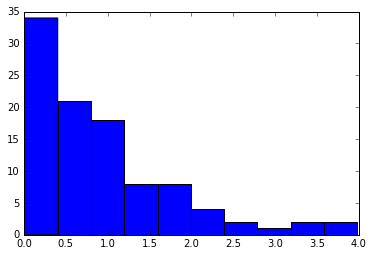

In [71]:
plt.hist(sampled_scaling_factors)

**NOW** We will organise our samples based on the number of servers we're running - effectively creating batches

In [72]:
samples = sampled_scaling_factors.reshape(NUMBER_OF_SIMULATIONS/len(ports),len(ports))
samples

array([[ 0.21828055,  0.36392667,  0.07106982,  0.35537556],
       [ 0.49925756,  2.28313128,  2.44344286,  1.35232922],
       [ 0.17703713,  0.24183259,  0.00623003,  0.36957271],
       [ 1.00505532,  3.98117835,  0.21893658,  0.14258378],
       [ 0.41440569,  1.00467281,  0.23425366,  0.49765048],
       [ 2.48401778,  0.64162755,  0.03718622,  0.92356851],
       [ 1.00677409,  0.57647994,  0.98670485,  0.43695266],
       [ 1.70815562,  0.51411446,  3.41275018,  0.42179291],
       [ 0.67056163,  0.05074394,  0.39060761,  0.36341694],
       [ 0.11971328,  0.58866828,  0.63181065,  2.05749534],
       [ 0.08459884,  0.82368285,  0.30062613,  1.906684  ],
       [ 0.5379337 ,  0.8772698 ,  1.87724781,  0.81314884],
       [ 1.5228271 ,  0.26858821,  0.42374207,  1.94993642],
       [ 3.68202781,  1.04852028,  0.84775752,  0.36325295],
       [ 0.11497461,  0.0120431 ,  1.58120889,  0.78542681],
       [ 0.09562667,  0.42759238,  1.32524812,  1.17473154],
       [ 1.62626417,  3.

If we iterate over our `samples` array now, we'll get groups of four. (The `break` statement stops after the first itertation of the loop)

In [73]:
for row in samples:
    print(row)
    break

[ 0.21828055  0.36392667  0.07106982  0.35537556]


**Importantly**, In switching on the output recording, we need to do so on each of the running servers:

In [74]:
# Store our time series criteria in a variable to use it in configuring recording and retrieving results
ts_match_criteria = {'NetworkElement':'Recreational Lake','RecordingVariable':'Spill Volume'}

for v in vs:
    v.configure_recording(enable=[ts_match_criteria])


Now, we want to trigger all our runs. We'll use the `run_async=True` option and wait for each group of runs to finish before starting the next group.

In [80]:
spill_results=[]
total_runs=0

for group in samples:
    group_run_responses = [] # Somewhere
    for i in range(len(vs)): # Will be 0,1.. #ports
        total_runs += 1
        scaling_factor = group[i]
        v = vs[i]

        # We are running the multiple many times in this case - so lets drop any results we already have...
        v.drop_all_runs()

        # Set $InflowScaling to current scaling factor
        v.update_function('$InflowScaling',scaling_factor)
        response = v.run_model(run_async=True)
        group_run_responses.append(response)

    #### NOW, All runs for this group have been triggered. Now go back and retrieve results
    
    # Retrieve the spill time series, as an annual sum, with the column named for the variable ('Spill Volume')
    for i in range(len(vs)): # Will be 0,1.. #ports
        scaling_factor = group[i]
        v = vs[i]
        r = group_run_responses[i]
        
        code = r.getresponse().getcode() # Wait until the job is finished

        run_results = v.retrieve_multiple_time_series(criteria=ts_match_criteria,timestep='annual',name_fn=veneer.name_for_variable)
    
        # Store the mean spill volume and the scaling factor we used
        spill_results.append({'ScalingFactor':scaling_factor,'SpillVolume':run_results['Spill Volume'].mean()})
    veneer.log('Completed %d runs'%total_runs)
    
# Convert the results to a Data Frame
import pandas as pd
spill_results_df = pd.DataFrame(spill_results)
spill_results_df

Completed 4 runs
Completed 8 runs
Completed 12 runs
Completed 16 runs
Completed 20 runs
Completed 24 runs
Completed 28 runs
Completed 32 runs
Completed 36 runs
Completed 40 runs
Completed 44 runs
Completed 48 runs
Completed 52 runs
Completed 56 runs
Completed 60 runs
Completed 64 runs
Completed 68 runs
Completed 72 runs
Completed 76 runs
Completed 80 runs
Completed 84 runs
Completed 88 runs
Completed 92 runs
Completed 96 runs
Completed 100 runs


,ScalingFactor,SpillVolume
0,0.218281,9.796761e+08
1,0.363927,1.740802e+09
2,0.071070,2.451256e+08
3,0.355376,1.695799e+09
4,0.499258,2.456641e+09
5,2.283131,1.205902e+10
6,2.443443,1.292749e+10
7,1.352329,7.028707e+09
8,0.177037,7.674732e+08
9,0.241833,1.101763e+09


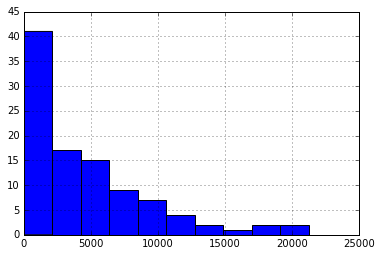

In [81]:
spill_results_df['SpillVolumeGL'] = spill_results_df['SpillVolume'] * 1e-6 # Convert to GL
spill_results_df['SpillVolumeGL'].hist()

### Final remarks

The above example isn't as efficient as it could be, but it may be good enough for many circumstances.

The simulations run in parallel, but everything else (configuring recorders, retrieving and post-processing results) is done sequentially. (And no simulations are taking place while that's happening). 

Furthermore, if some model runs complete quicker than others, one or more Veneer servers will be idle waiting for further instructions.

The example above is a reasonable approach if the simulations take much longer than the post processing and if the simulations will typically take around the same amount of time.

In [82]:
# Terminate the veneer servers
kill_all_now(processes)